In [1]:
from numpy import unique
from numpy import where
from pandas import read_csv
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot

In [2]:
# Dataset to use. Lazy definition-test
w=0.90
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[w], flip_y=0, random_state=1)
# Report of classification, before undersample
local_counter = Counter(y)
print(local_counter)

Counter({0: 901, 1: 99})


In [3]:
""" Pick one to try. Definitions
NearMiss: 1 Majority class examples with minimum average distance to three closest minority class examples.
NearMiss: 2 Majority class examples with minimum average distance to three furthest minority class examples.
NearMiss: 3 Majority class examples with minimum distance to each minority class example.
"""
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution, after undersample
local_counter = Counter(y)
print(local_counter)

Counter({0: 99, 1: 99})


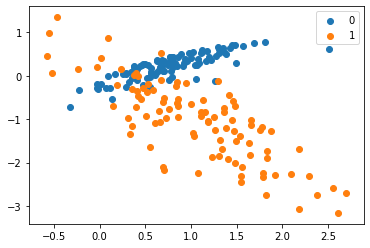

In [4]:
# scatter plot of examples by class label
for label, _ in local_counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()